<a href="https://colab.research.google.com/github/YuzhouLin/current_proj/blob/feature-20210203-devtest/plot_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch

In [29]:
print(torch.__version__)

1.4.0


In [6]:
import yaml
from yaml import Loader, Dumper

In [10]:
with open("config.yaml", 'r') as stream:
    a = yaml.safe_load(stream)

In [24]:
data_config = a['DATA_CONFIG']
process_config = data_config['DATA_PROCESSOR']
print(process_config[0]['SHUFFLE_ENABLED'])

{'train': True, 'test': False}


In [2]:
# load the data
results = pd.read_csv('results/temp/accuracy_temp.csv')

In [3]:
results.head

<bound method NDFrame.head of     edl_used  tcn_used  sb_n  day_n  time_n  gesture  recall
0          0     False     1      5       1        1     0.0
1          0     False     1      5       1        2     0.0
2          0     False     1      5       1        3     1.0
3          0     False     1      5       1        4     0.0
4          0     False     1      5       1        5     0.0
5          0     False     1      5       1        6     0.0
6          0     False     1      5       1        7     0.0
7          0     False     1      5       1        8     0.0
8          0      True     1      5       1        1     0.0
9          0      True     1      5       1        2     0.0
10         0      True     1      5       1        3     0.0
11         0      True     1      5       1        4     0.0
12         0      True     1      5       1        5     0.0
13         0      True     1      5       1        6     0.0
14         0      True     1      5       1        7   

In [19]:
#  Trun Confusion matrix into percentage form
CM_model = []
for i in range(4): # 4 models
    CM_cv = []
    for j in range(6): # 6 trials
        CM_sb = []
        for k in range(10): # 10 subjects
            CM_sb.append((CM[i][j][k].T /CM[i][j][k].astype(np.float).sum(axis=1)).T)
        CM_cv.append(CM_sb)
    CM_model.append(CM_cv)

CM_model_ave = np.mean(CM_model, axis=(1,2))

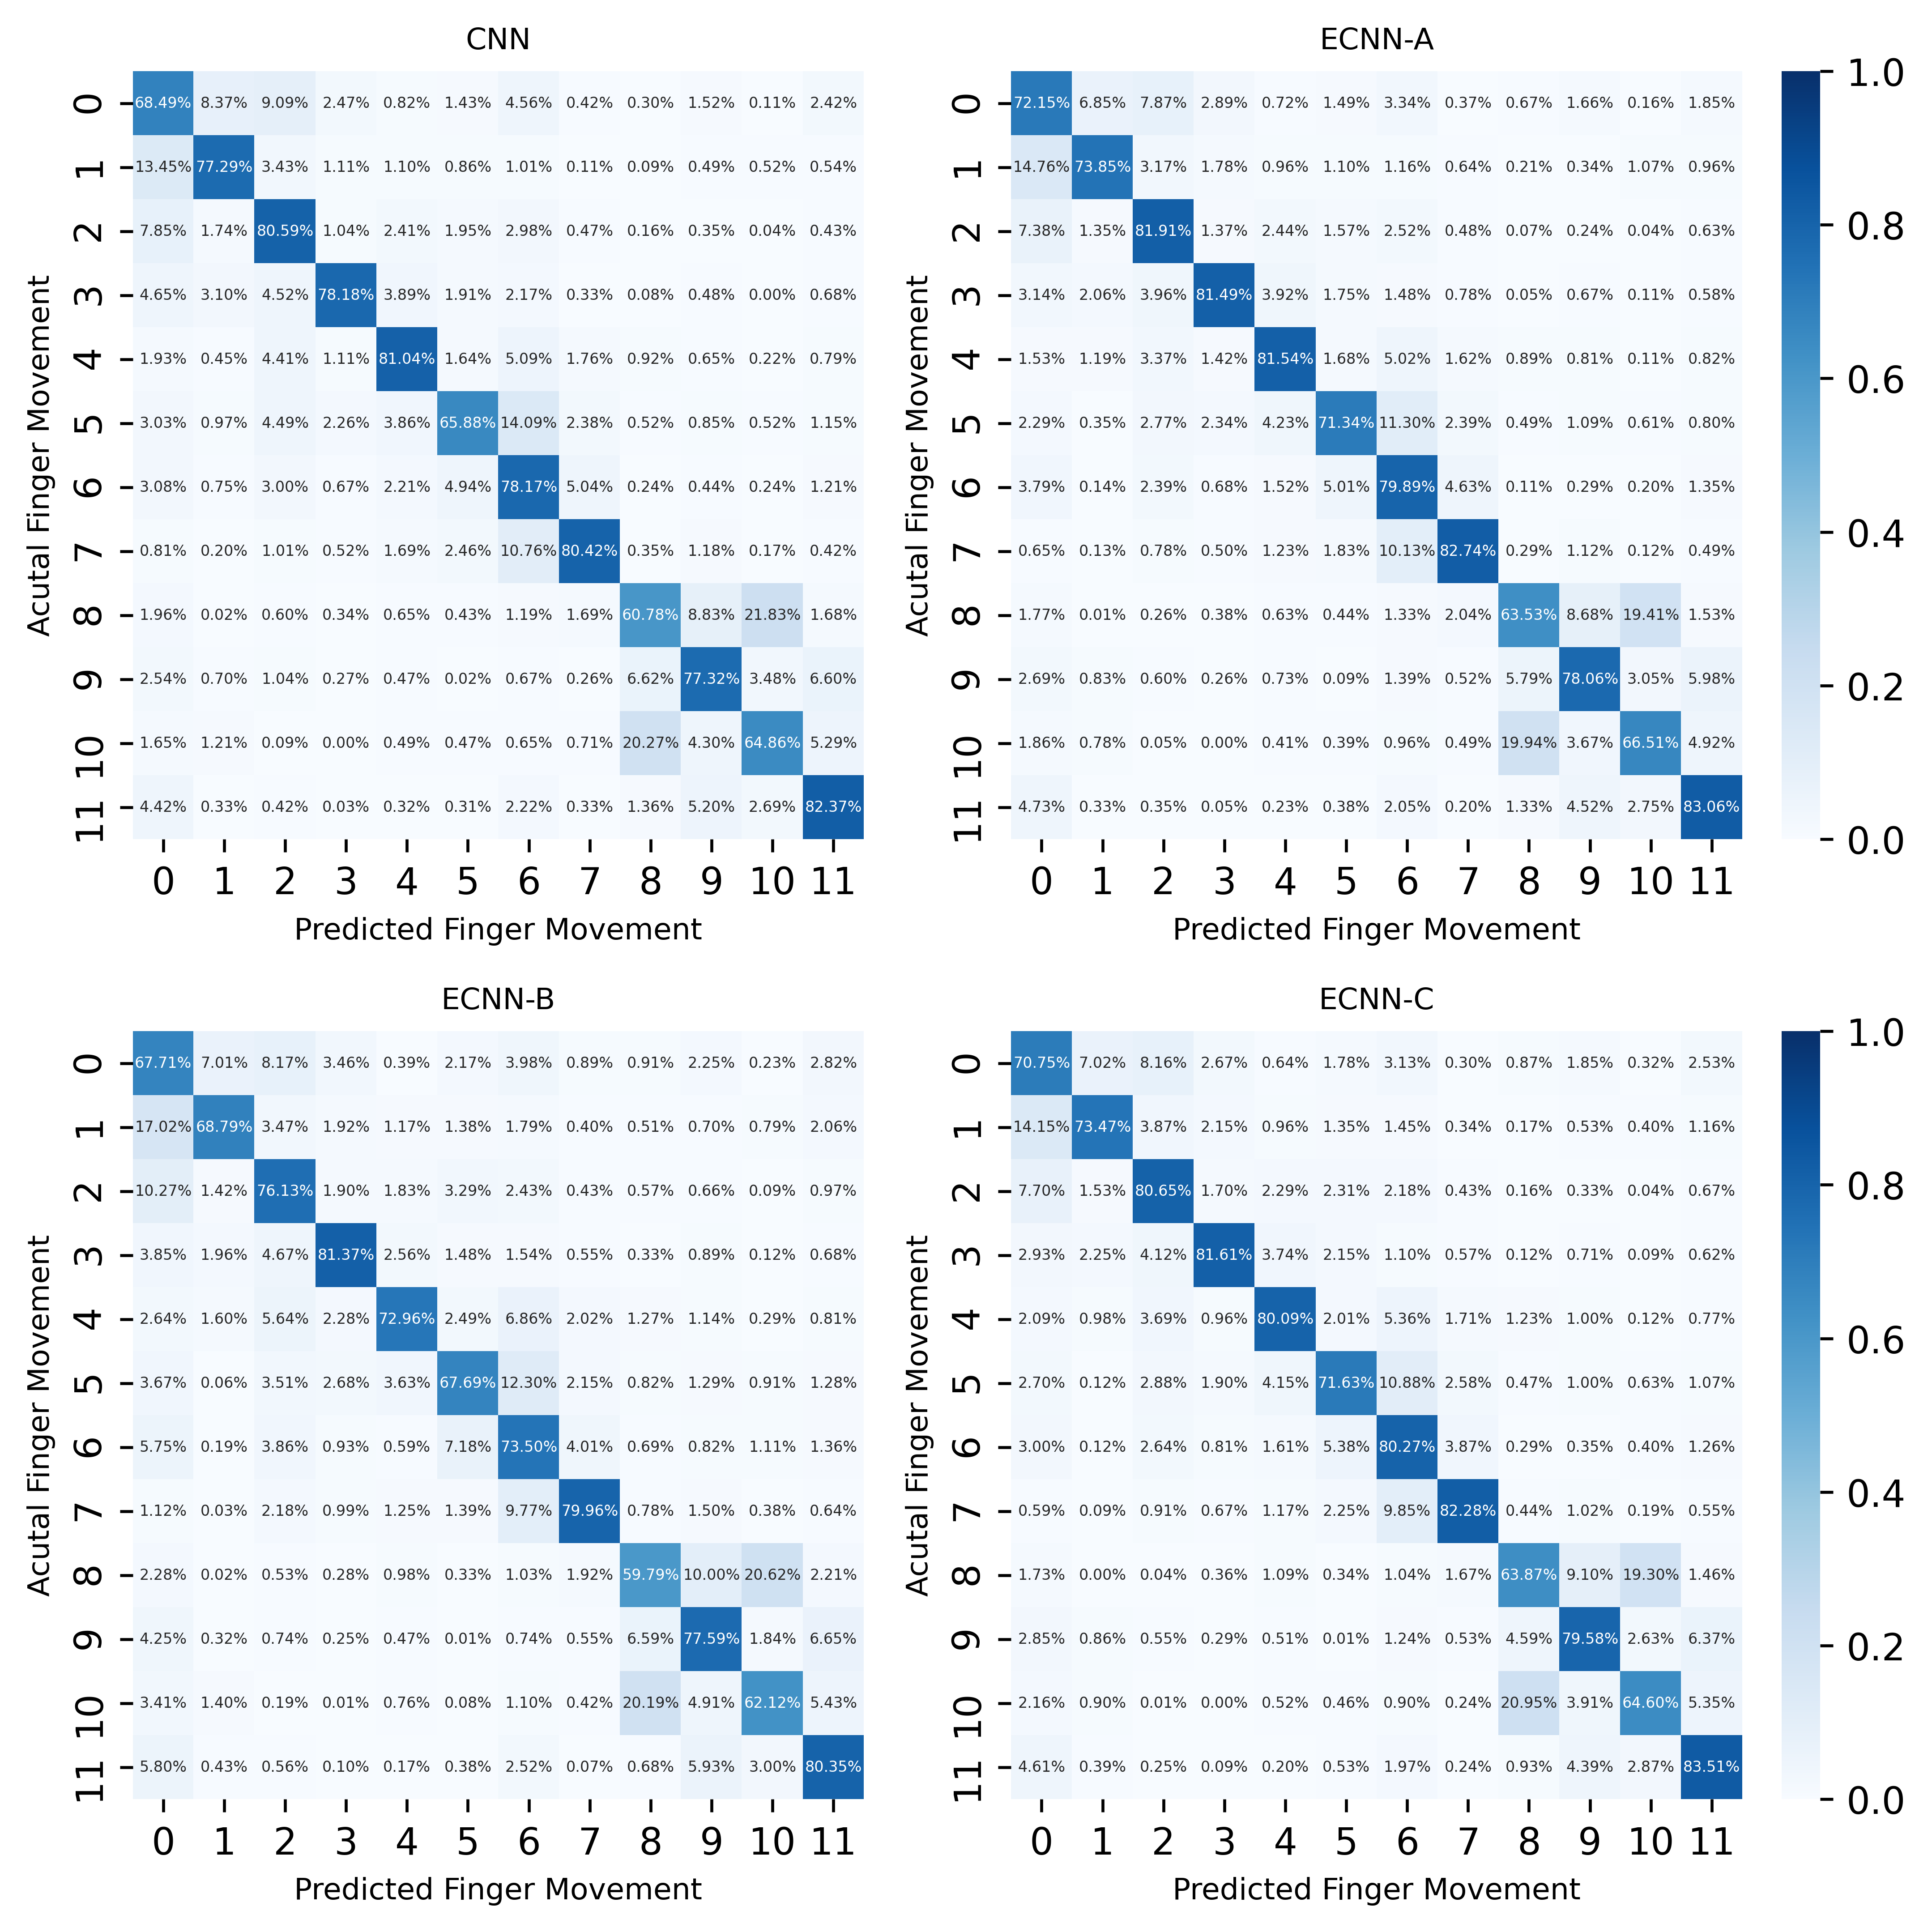

In [34]:
f, axes = plt.subplots(2,2, figsize = (7.08, 7.08), constrained_layout=True,dpi=600)

i=0
for ax in axes.ravel():
    #sns.heatmap(CM[i], ax = ax, cmap='GnBu')
    colorbar = True if i==1 or i==3 else False
    sns.heatmap(CM_model_ave[i], ax = ax, annot=True, cmap='Blues', vmax=1, vmin=0, fmt='.2%', annot_kws={'size': 4}, cbar=colorbar)
    i+=1


labels = ['CNN','ECNN-A','ECNN-B','ECNN-C']
for ax, label in zip(axes.ravel(), labels):
    ax.set_title(label,loc='center', fontdict={'fontsize': 8})
    ax.set_xlabel('Predicted Finger Movement', fontdict={'fontsize': 8})
    ax.set_ylabel('Acutal Finger Movement', fontdict={'fontsize': 8})

plt.savefig("./results/confusion_matrix_macroave.eps", format='eps', bbox_inches='tight', dpi=600, pad_inches=0.0)
plt.savefig("./results/confusion_matrix_macroave.png", format='png', bbox_inches='tight', dpi=600, pad_inches=0.0)